# Exercise project 2 – ANN for Classification (Breast cancer dataset)


This project was a binary classification task using the Wisconsin Breast Cancer dataset. The goal was to predict whether a tumor was benign or malignant based on various measurements taken from a digitized image of a breast mass. This dataset is commonly used for classification practice and is very clean, but I limited myself to the six most correlated features to simulate working with a reduced set of diagnostic inputs.


https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

### Step 0: Importing libraries and loading the dataset

In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from sklearn.metrics import classification_report

In [ ]:
folder_path = '/content/drive/MyDrive/deeplearning2024_VincenzinaSoos/ex_2/'
os.chdir(folder_path)

In [ ]:
df = pd.read_csv('data/breast_cancer_wisconsin.csv')

### Step 1: Data analysis and visualisations

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

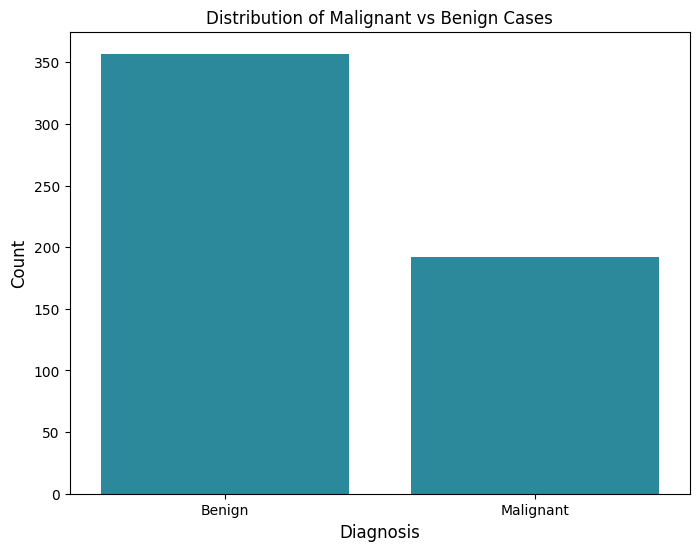

In [ ]:
diagnosis_counts = df['diagnosis'].value_counts().reset_index()
diagnosis_counts.columns = ['Diagnosis', 'Count']
diagnosis_counts['Diagnosis'] = diagnosis_counts['Diagnosis'].map({0: 'Benign', 1: 'Malignant'})

# bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=diagnosis_counts, x='Diagnosis', y='Count', color='#1995ad')
plt.title('Distribution of Malignant vs Benign Cases')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Diagnosis', fontsize=12)
plt.show()

Correlation Matrix

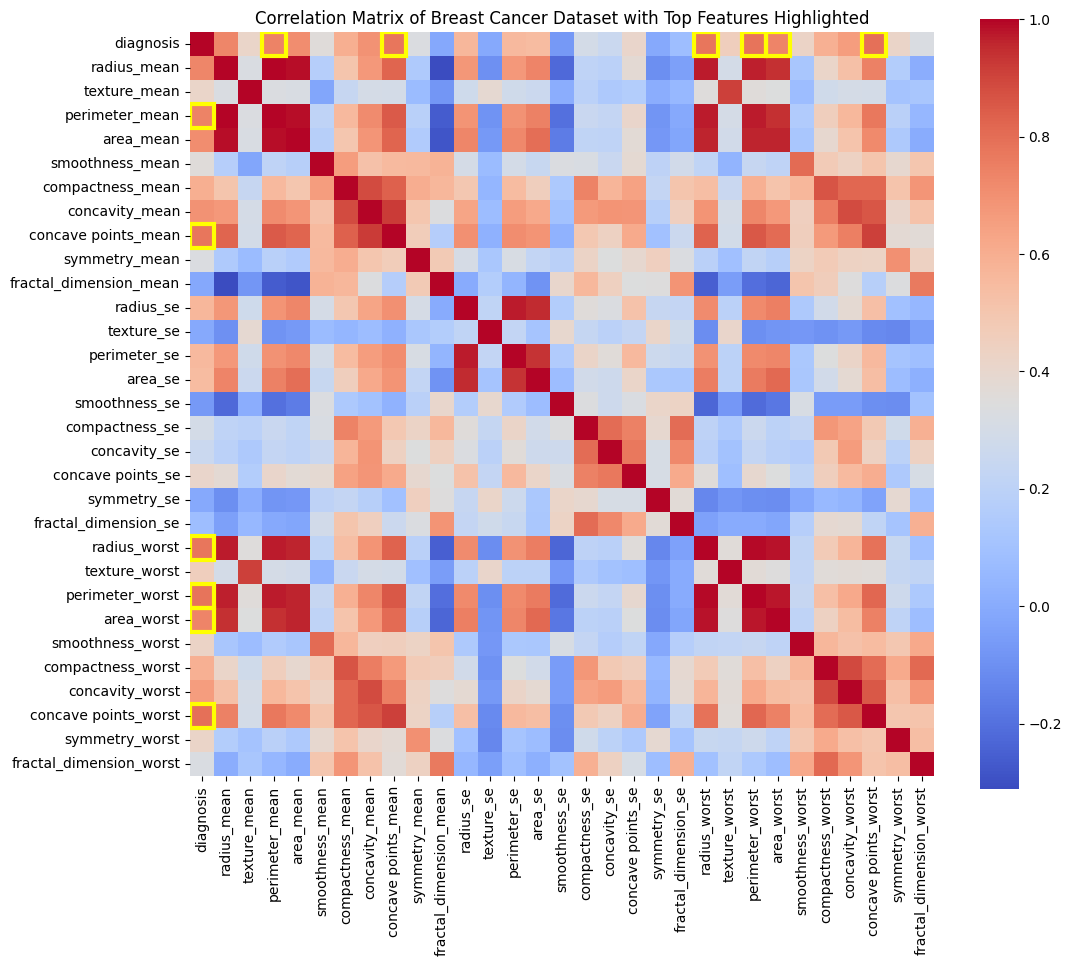

In [ ]:
data = df.drop(['id', 'Unnamed: 32'], axis=1)

# 'diagnosis' column to numeric: 'M' -> 1, 'B' -> 0
data['diagnosis'] = data['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

correlation_matrix = data.corr()

# top correlated features with the target column 'diagnosis'
top_features = correlation_matrix['diagnosis'].abs().sort_values(ascending=False)[1:7].index

# heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", square=True)

# top correlations with the 'diagnosis' column
diagnosis_index = list(correlation_matrix.columns).index('diagnosis')
for feature in top_features:
    feature_index = list(correlation_matrix.columns).index(feature)
    plt.gca().add_patch(plt.Rectangle((diagnosis_index, feature_index), 1, 1, fill=False, edgecolor='yellow', lw=3))
    plt.gca().add_patch(plt.Rectangle((feature_index, diagnosis_index), 1, 1, fill=False, edgecolor='yellow', lw=3))

plt.title('Correlation Matrix of Breast Cancer Dataset with Top Features Highlighted')
plt.show()

Here, I choose the most correlating columns to use.

In [ ]:
correlated_columns = top_features.to_list()
print("correlated columns:", correlated_columns)

correlated columns: ['concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst', 'perimeter_mean', 'area_worst']


Pairplot

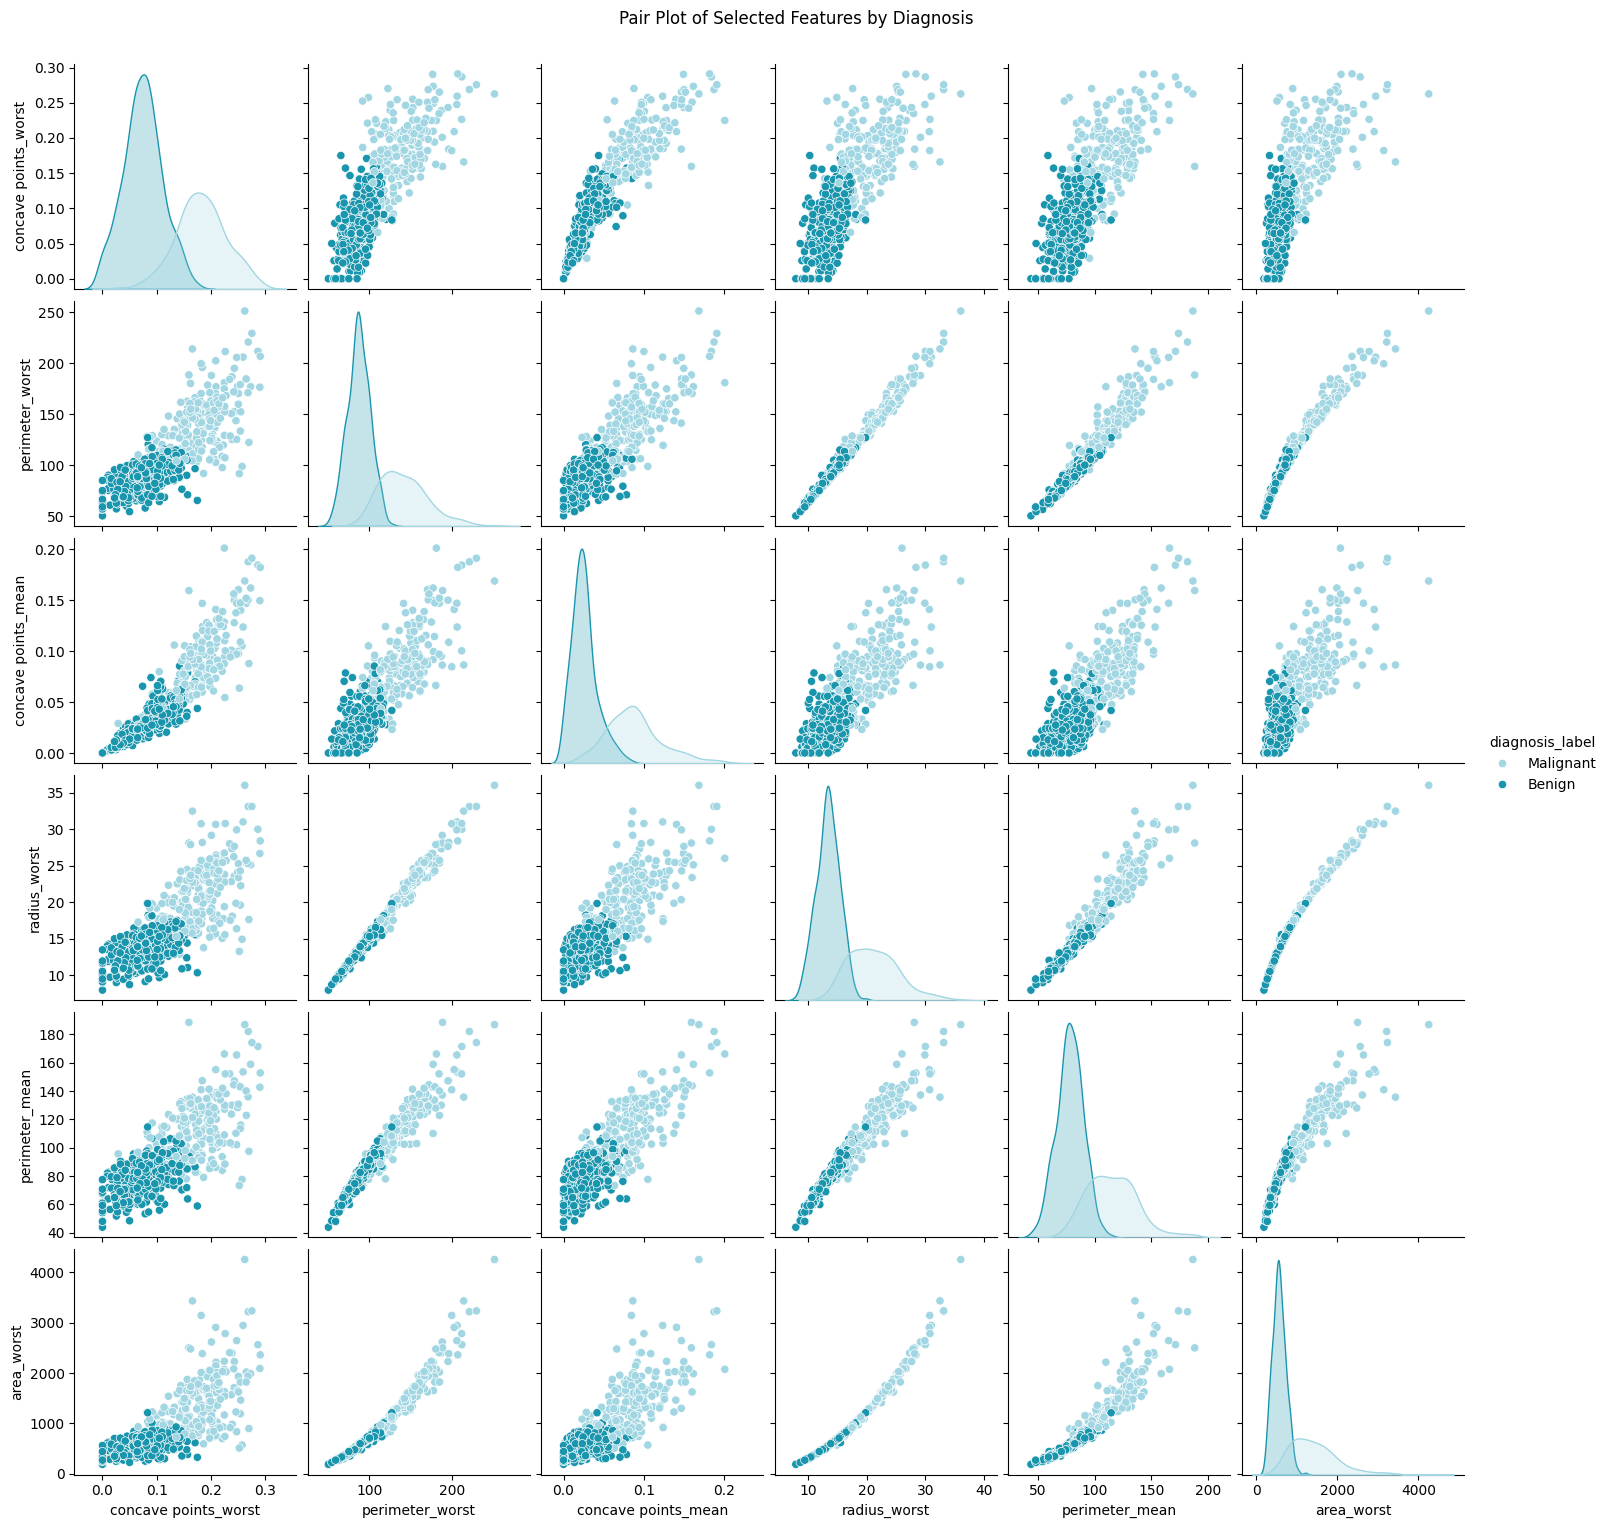

In [ ]:
# pairplot
data['diagnosis_label'] = data['diagnosis'].map({0: 'Benign', 1: 'Malignant'})

pairplot = sns.pairplot(
    data[['concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst', 'perimeter_mean', 'area_worst', 'diagnosis_label']],
    hue='diagnosis_label',
    palette=['#a1d6e2', '#1995ad']
)
pairplot.fig.suptitle("Pair Plot of Selected Features by Diagnosis", y=1.02)  # Adjust title position
plt.show()

Correlation Matrix with selected features

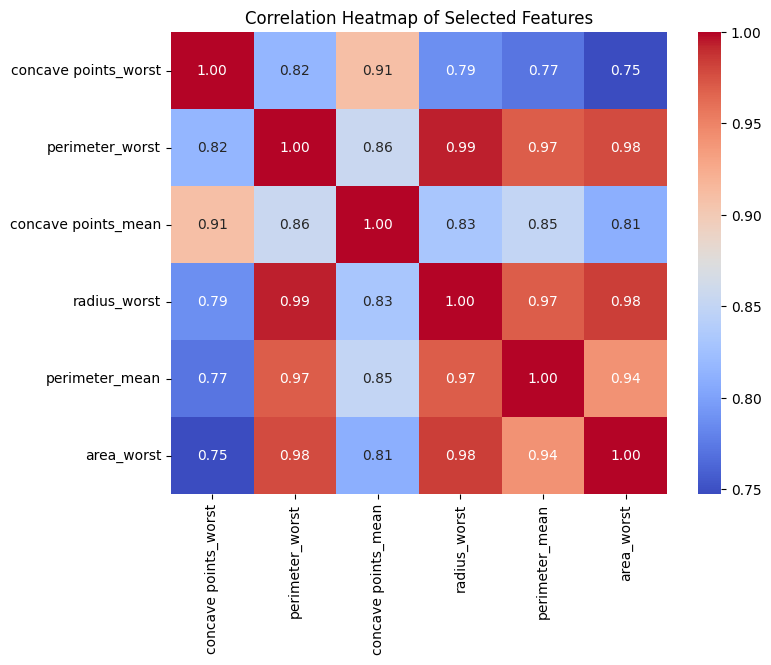

In [ ]:
plt.figure(figsize=(8, 6))
subset_corr = data[['concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst', 'perimeter_mean', 'area_worst']].corr()
sns.heatmap(subset_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Selected Features")
plt.show()

Histograms

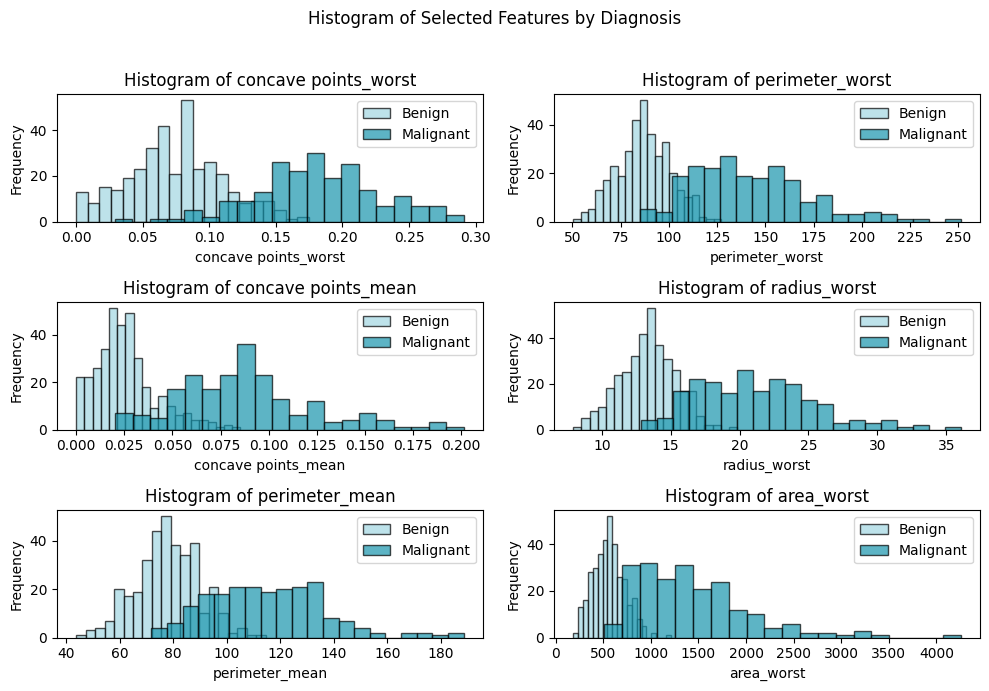

In [ ]:
# Separate the data by diagnosis
malignant = data[data['diagnosis'] == 1]  # Malignant cases
benign = data[data['diagnosis'] == 0]     # Benign cases

# Plot histograms for selected features
features = ['concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst', 'perimeter_mean', 'area_worst']
plt.figure(figsize=(10, 7))

for i, feature in enumerate(features):
    plt.subplot(3, 2, i + 1)
    plt.hist(benign[feature], bins=20, alpha=0.7, label='Benign', color='#a1d6e2', edgecolor='black')
    plt.hist(malignant[feature], bins=20, alpha=0.7, label='Malignant', color='#1995ad', edgecolor='black')
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()

plt.suptitle("Histogram of Selected Features by Diagnosis")
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
plt.show()


In [ ]:
columns_to_keep = ['diagnosis'] + correlated_columns

# Drop all other columns
df = df[columns_to_keep]
df.head()

,diagnosis,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst
0,M,0.2654,184.60,0.14710,25.38,122.80,2019.0
1,M,0.1860,158.80,0.07017,24.99,132.90,1956.0
2,M,0.2430,152.50,0.12790,23.57,130.00,1709.0
3,M,0.2575,98.87,0.10520,14.91,77.58,567.7
4,M,0.1625,152.20,0.10430,22.54,135.10,1575.0


In [ ]:
df.shape

(569, 7)

In [ ]:
numerical_columns = df.select_dtypes(exclude=object).columns.tolist()

for col in numerical_columns:
    upper_limit = df[col].mean() + 3 * df[col].std()
    lower_limit = df[col].mean() - 3 * df[col].std()
    df = df[(df[col] <= upper_limit) & (df[col] >= lower_limit)]

In [ ]:
df.describe()

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,0.110395,103.863260,0.045720,15.788049,89.632386,814.424044
std,0.062530,28.771372,0.034706,4.160160,21.096622,446.759933
min,0.000000,50.410000,0.000000,7.930000,43.790000,185.200000
25%,0.063350,83.740000,0.019690,12.970000,74.720000,510.500000
50%,0.097440,96.660000,0.032500,14.800000,85.480000,670.600000
75%,0.155600,120.300000,0.066180,17.870000,102.100000,981.200000
max,0.290300,195.000000,0.156200,27.660000,147.200000,2232.000000


In [ ]:
df.shape

(549, 7)

### Step 2: Data pre-processing

In [ ]:
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [ ]:
encoder = LabelEncoder()
df['diagnosis'] = encoder.fit_transform(df['diagnosis'])

In [ ]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [ ]:
# 80/20% split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 3: Model Architecture

In [ ]:
model = tf.keras.Sequential()

# Adding layers using model.add()
model.add(tf.keras.layers.Dense(16, activation='relu', input_dim=6))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 16)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 257 (1.00 KB)

 Trainable params: 257 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

adding a validation split because I have enough datapoints

In [ ]:
history = model.fit(X_train, y_train, epochs=150, validation_split=0.2)

Epoch 1/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6492 - loss: 0.6918 - val_accuracy: 0.5909 - val_loss: 0.6898
Epoch 2/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6918 - loss: 0.6832 - val_accuracy: 0.5909 - val_loss: 0.6850
Epoch 3/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6786 - loss: 0.6763 - val_accuracy: 0.5909 - val_loss: 0.6785
Epoch 4/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6791 - loss: 0.6690 - val_accuracy: 0.6250 - val_loss: 0.6711
Epoch 5/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7156 - loss: 0.6596 - val_accuracy: 0.6591 - val_loss: 0.6633
Epoch 6/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7217 - loss: 0.6504 - val_accuracy: 0.7045 - val_loss: 0.6531
Epoch 7/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7554 - loss: 0.6409 - val_accuracy: 0.7386 - val_loss: 0.6405
Epoch 8/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7875 - loss: 0.6240 - val_accuracy: 0.7500 - 

### Step 4: Model Evaluation

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[69,  1],
       [ 3, 37]])

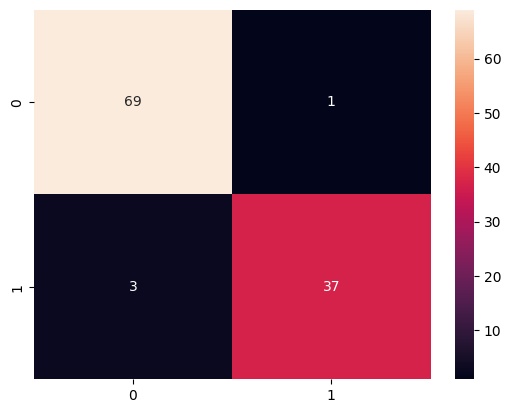

In [ ]:
sns.heatmap(cm, annot=True)
plt.show()

In [ ]:
# Generate and display the classification report
report = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])
print(report)

              precision    recall  f1-score   support

      Benign       0.96      0.99      0.97        70
   Malignant       0.97      0.93      0.95        40

    accuracy                           0.96       110
   macro avg       0.97      0.96      0.96       110
weighted avg       0.96      0.96      0.96       110



### Personal Analysis / Refelection

It has 569 rows and 33 columns, but to challenge myself (and maybe because I got overwhelmed), I reduced it to the six most correlated features with the diagnosis label.

I dropped outliers using the 3 sigma rule, which reduced the data 569 to 549 rows. Then I normalized everything with MinMaxScaler and encoded the labels with LabelEncoder. After the preprocessing, I split the dataset 80/20 for training and testing, beacuse there were rather few instances to work with.

I trained the model for 150 epochs and used a validation split of 0.2. The accuracy started at 64.9% and climbed slowly, but the validation accuracy fluctuated a lot.

I got 96% accuracy on the test set. The confusion matrix shows 69 true negatives, 37 true positives, 1 false positive, and 3 false negatives. That means the model almost never misclassifies benign tumors (99% recall for benign), but it does miss a few malignant ones, which is more a bigger issue in practice.

I didn’t want to include fake unchecked imaginary data. The logic for prediction is not hard, but I didn’t feel confident enough to stand by the numbers, so I left it out.